In [2]:
import pandas as pd

In [3]:
#dataset esta aqui --> https://www.tensorflow.org/tutorials/estimator/linear

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

print(dftrain.head())
print(dfeval.head())

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
   survived     sex   age  n_siblings_spouses  parch     fare   class  \
0         0    male  35.0                   0      0   8.0500   Third   
1         0    male  54.0                   0      0  51.8625   First   
2         1  female  58.0                   0      0  26.5500   First   
3         1  female  55.0                   0      0  16.0000  Second   
4         

In [4]:
y_train = dftrain.pop("survived") #pega apenas a coluna survived remove ela do dataframe e coloca nessa variavel
y_test = dfeval.pop("survived")
print(y_train.head())
print(y_test.head())

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64
0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64


In [5]:
dftrain.describe() # da alguns informacoes estaticas sobre os dados

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [9]:
dftrain.shape # mesma coisa que e o shape do tensorflow

(627, 9)

<AxesSubplot:>

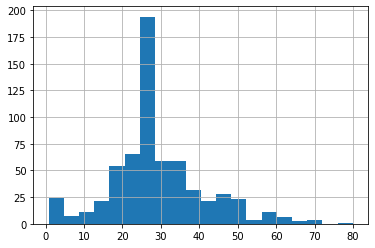

In [13]:
dftrain.age.hist(bins=20)

Catergorical data --> dados que geralmente nao sao numericos, mas podem ser, e possuem categorias, como feminino e masculino

In [6]:
dftrain.columns

Index(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck',
       'embark_town', 'alone'],
      dtype='object')

In [12]:
dftrain.dtypes

sex                    object
age                   float64
n_siblings_spouses      int64
parch                   int64
fare                  float64
class                  object
deck                   object
embark_town            object
alone                  object
dtype: object

In [13]:
numerical_columns = ["age", "fare"]
categorical_columns = ["sex", "n_siblings_spouses", "parch", "class", "deck", "embark_town", "alone"]

In [17]:
import tensorflow as tf

2022-06-29 13:54:41.844385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-29 13:54:41.844404: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
feature_columns = [] # colunas que serao usadas para treinar

for feature_name in categorical_columns:
    vocabulary = dftrain[feature_name].unique()
    print(f"valores unicos da coluna {feature_name} --> {vocabulary}")
    feature_columns.append( tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary) )


for feature_name in numerical_columns:
    feature_columns.append( tf.feature_column.numeric_column(feature_name, dtype=tf.float32) )
    
print(feature_columns)

valores unicos da coluna sex --> ['male' 'female']
valores unicos da coluna n_siblings_spouses --> [1 0 3 4 2 5 8]
valores unicos da coluna parch --> [0 1 2 5 3 4]
valores unicos da coluna class --> ['Third' 'First' 'Second']
valores unicos da coluna deck --> ['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
valores unicos da coluna embark_town --> ['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
valores unicos da coluna alone --> ['n' 'y']
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=